In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import TargetÇ

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [4]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [5]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


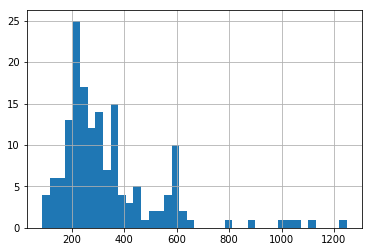

In [6]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [7]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [8]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [9]:
dicti = creating_dict()

In [10]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [11]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

In [12]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [13]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [14]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fcca8e14978>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fcca8e14128>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fcca8e45780>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fcca933a4a8>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fcca933a198>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fcca933a048>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fcca8dc7b38>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fcca8dc7b70>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fcca8dc7ba8>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fcca8dc7be0>,0.0


In [15]:
df_digit1 = first_digit_EC(df_bin)

In [16]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fcca8e14978>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fcca8e14128>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fcca8e45780>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fcca933a4a8>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fcca933a198>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fcca933a048>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fcca8dc7b38>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fcca8dc7b70>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fcca8dc7ba8>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fcca8dc7be0>,0.0,[nan]


In [17]:
labels_task1 = bin_to_onehot(df_digit1, 2)

In [18]:
labels_task1

[array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0.

There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


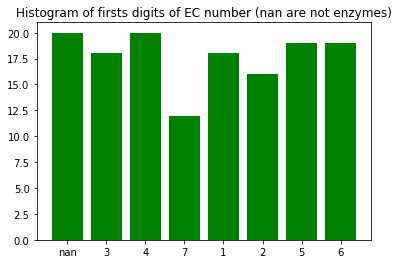

In [19]:
counting_multilabel(df_digit1)

In [20]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [21]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [22]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, labels_task1, ec_multilabel)

In [23]:
splitting_sets = splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [24]:
len(dicti_padding['post_padding'])

142

In [25]:
ec_multilabel.shape

(142, 7)

In [27]:
creating_augmented_data(dicti_padding, labels_task1, splitting_sets, 'prueba/', 'aug_data.h5', 
                            labels_task2 = ec_multilabel, kfold_bool = True)

In [ ]:
#keeping only indices from enzymes
#def keeping_indices_enzymes(df, idx_train, idx_val, idx_test, folder, kfold=False):
#"""Re-creates again training, validation and test sets only with enzymes"""
#keeping only indices from enzymes
enzyme_bin = [x.argmax(-1) for x in labels_task1]
indices_enzyme = [idx for idx, x in enumerate(list(df["enzyme"])) if x==1.0]
#keeping only enzyme indices for each set
enz_idx_train = [i for i in idx_train if i in indices_enzyme]
enz_idx_val = [i for i in idx_val if i in indices_enzyme]
enz_idx_test = [i for i in idx_test if i in indices_enzyme]
    
    file_idcs_new = os.path.join(absPath, 'data/', folder, 'idcs_split_enzyme.pickle')
    if kfold == False:
        with open(file_idcs_new, "wb") as output_file:
            pickle.dump((enz_idx_train, enz_idx_val, enz_idx_test), output_file)
    else:
        return (enz_idx_train, enz_idx_val, enz_idx_test)

In [30]:
def keeping_indices_enzymes(labels_task1, indices, folder, name_file, kfold_bool==False):
    """Re-creates again training, validation and test sets only with enzymes"""
    enzyme_bin = [x.argmax(-1) for x in labels_task1]
    indices_enzyme = [idx for idx, x in enumerate(enzyme_bin) if x==1.0]
    if kfold_bool == False:
        #indices should be a tuple with i_train, i_val and i_test
        i_train, i_val, i_test = indices
        #keeping only enzyme indices for each set
        enz_idx_train = [i for i in i_train if i in indices_enzyme]
        enz_idx_val = [i for i in i_val if i in indices_enzyme]
        enz_idx_test = [i for i in i_test if i in indices_enzyme]
        file_idcs = os.path.join(absPath, 'data/', folder, name_file)
        with open(file_idcs, "wb") as output_file:
            pickle.dump((enz_idx_train, enz_idx_val, enz_idx_test), output_file)
    else:
        k_indices = []
        for k_fold in indices:
            i_train, i_val, i_test = k_fold
            enz_idx_train = [i for i in i_train if i in indices_enzyme]
            enz_idx_val = [i for i in i_val if i in indices_enzyme]
            enz_idx_test = [i for i in i_test if i in indices_enzyme]
            k_indices.append((enz_idx_train, enz_idx_val, enz_idx_test))
        file_idcs = os.path.join(absPath, 'data/', folder, name_file)
        with open(file_idcs, "wb") as output_file:
            pickle.dump(k_indices, output_file)

[array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0.

In [34]:
binn = [x.argmax(-1) for x in labels_task1]

In [35]:
[idx for idx, x in enumerate(binn) if x==1.0]

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141]

In [ ]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

In [ ]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
#model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

In [ ]:
#hay que hacer otra funcion para aug, para quedarse solo con las enzimas

In [ ]:
#hay que probar las funciones de mantener los indices de las enzimas. creo que la primera habria que modificarla, 
#para que en lugar del dataframe use labels_task1

In [ ]:
idx_enz = [idx for idx,x in enumerate(list(list(np.array(df_digit1['enzyme'])).argmax(-1))) if x==1.0]


In [ ]:
list(np.array(df_digit1['enzyme']))

In [ ]:
len(dicti_padding)

In [ ]:
isinstance(ec_multilabel, np.ndarray)

In [ ]:
types_padding = [pre, post, mid, rdm]
post = ['aa0', 'bb0', 'cc0', 'dd0', 'ee0']
pre = ['0aa', '0bb', '0cc', '0dd', '0ee']
mid = ['a0a', 'b0b', 'c0c', 'd0d', 'e0e']
rdm = ['aai', 'bib', 'cci', 'idd', 'eie']
labels = [0,1,0,1,0]
labels_2 = [1,2,3,4,5]
i_train = [0,2,4]
i_test = [1,3]

In [ ]:
aug, task1, task2 = [], [], []
for i in range(len(post)):
    for j in types_padding:
        aug.append(j[i]), task1.append(labels[i]), task2.append(labels_2[i])
    #aug.append(post[i]), aug.append(pre[i])

In [ ]:
aug

In [ ]:
task1

In [ ]:
task2

In [ ]:
prueba_i = [list(range(x*len(types_padding),(x*len(types_padding)+len(types_padding)))) for idx,x in enumerate(i_train)]
prueba_i

In [ ]:
from itertools import chain 
new_i_train = list(chain(*prueba_i))
print(new_i_train)
shuffled = random.shuffle(new_i_train)
print(new_i_train)

In [ ]:
[aug[i] for i in new_i_train]

In [ ]:
[task1[i] for i in new_i_train]

In [ ]:
[task2[i] for i in new_i_train]

In [ ]:
#probamos a shuffle
index_shuf = random.shuffle(new_i_train)
index_shuf

In [ ]:
new_i_train